In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thearmada/spam-emails-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spam-emails-dataset


In [2]:
## Install the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [3]:
## Import the dataset

## Perform the EDA in the data

df=pd.read_csv(r'/kaggle/input/spam-emails-dataset/emails_dataset.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## Perform the EDA in the Dataset



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [6]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
df.isna().sum()

text    0
spam    0
dtype: int64

In [8]:
df.duplicated().sum()

33

## Remove the duplicate values

In [9]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
## Check the distribution of the spam and non-spam values
print(df['spam'].value_counts())

spam
0    4327
1    1368
Name: count, dtype: int64


In [11]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df['text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
print(df.head())

                                                text  spam
0  subject naturally irresistible corporate ident...     1
1  subject stock trading gunslinger fanny merrill...     1
2  subject unbelievable new homes made easy im wa...     1
3  subject color printing special request additio...     1
4  subject money get software cds software compat...     1


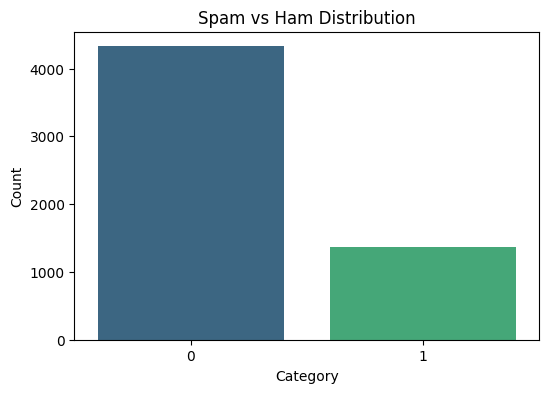

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='spam', data=df, palette='viridis') 
plt.title("Spam vs Ham Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=20)
common_words = cv.fit_transform(df['text'])
common_words_df = pd.DataFrame(cv.get_feature_names_out(), columns=['Word'])
print("Most common words:\n", common_words_df)

Most common words:
            Word
0      business
1            cc
2           com
3           ect
4        energy
5         enron
6         group
7           hou
8   information
9      kaminski
10         know
11         like
12          new
13           pm
14     research
15         risk
16      subject
17       thanks
18         time
19        vince


In [15]:
## Split the data into train and test 

X = df['text']
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [17]:
## Train the regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [18]:
## Evalue the model and predict score
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       843
           1       0.99      0.93      0.96       296

    accuracy                           0.98      1139
   macro avg       0.98      0.96      0.97      1139
weighted avg       0.98      0.98      0.98      1139

Confusion Matrix:
 [[840   3]
 [ 20 276]]


In [19]:
## Train the Random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [20]:
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       843
           1       0.98      0.95      0.97       296

    accuracy                           0.98      1139
   macro avg       0.98      0.97      0.98      1139
weighted avg       0.98      0.98      0.98      1139

